In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
import json

scores = dict()
with open("scores.json", "r") as fi:
    scores = json.load(fi)

In [3]:
thresholds = np.array(list(reversed(scores["roc"]["thresholds"])))
gar = np.array(list(reversed(scores["roc"]["gar"])))
far = np.array(list(reversed(scores["roc"]["far"])))
frr = 1 - gar
grr = 1 - far

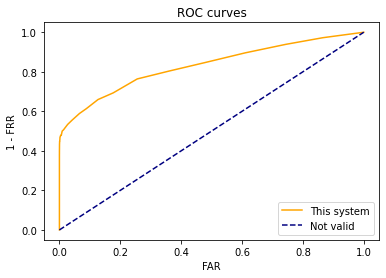

In [18]:
plt.plot(far, gar, label = "ROC curve", color='orange')
plt.plot([0,1], [0,1], label = "Not valid", color="navy", linestyle='--')
plt.xlabel("FAR") 
plt.ylabel("1 - FRR") 
plt.title("ROC curves") 
plt.legend(["This system", "Not valid"], loc=4)
_ = plt.show()

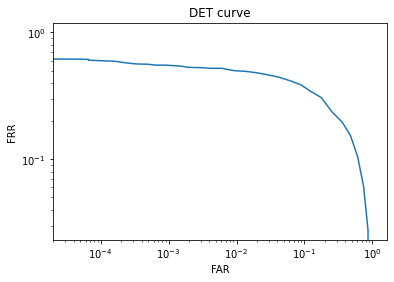

In [28]:
plt.plot(far, frr, label = "DET")
#plt.plot([1,0], [0,1], label = "Not valid")
plt.title("DET curve") 
plt.xlabel("FAR") 
plt.ylabel("FRR") 
plt.yscale('log')
plt.xscale('log')
#plt.legend(["DET"], loc=3)
_ = plt.show()

In [34]:
#equal error threshold

def eer_thr():
    x = 0
    err = 1
    for i in range(len(far)):
        if abs(far[i]-frr[i]) < err:
            x= i
            err = abs(far[i]-frr[i])
    return x
x = eer_thr()

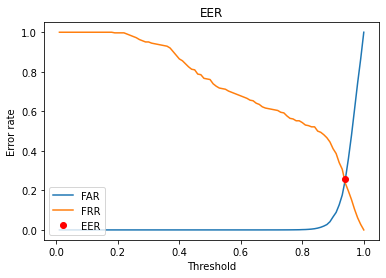

In [111]:
plt.plot(thresholds, far, label = "FAR" )
plt.plot(thresholds, frr, label = "FRR")
eer_thresh = eer_thr()
plt.plot(thresholds[eer_thresh], far[x], "ro")
plt.xlabel("Threshold") 
plt.ylabel("Error rate") 
plt.title("EER") 
plt.legend(["FAR", "FRR", "EER"], loc=3)
_ = plt.show()